# First analysis:

### This notebook will be dedicated to unveil the surfeace insight of the real estate data 

In [138]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sb

In [139]:
df = pd.read_csv("../data/real_estate_28-06-2022_v2.csv")

['departamentos' 'casas' 'sitios' 'parcelas' 'oficinas' 'locales'
 'terrenos' 'industriales' 'agrícolas' 'bodegas' 'otros inmuebles'
 'estacionamientos' 'loteos' 'lotes de cementerio']


<AxesSubplot:>

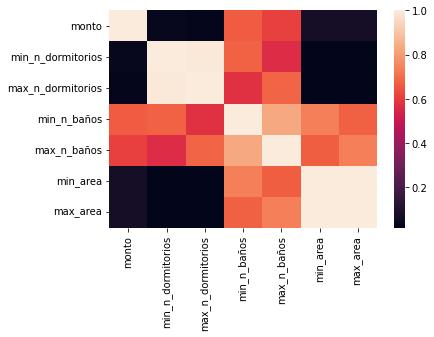

In [140]:
print(df["propiedad"].unique())
df = df.loc[df["oferta"]=="venta",:]
corr = df.loc[df["propiedad"]=="casas",:].corr()
sb.heatmap(corr)

In [141]:
ha_mask = df["unidad_medida"] == "ha"
df.loc[ha_mask, "area_m2"] = df.loc[ha_mask, "min_area"] * 10000
df.loc[[not ha for ha in ha_mask], "area_m2"] = df.loc[[not ha for ha in ha_mask], "min_area"] 
df.loc[ha_mask,"area_m2"]

4038         30000.0
4041         30000.0
4055        510000.0
4059      11450000.0
4076     105450000.0
            ...     
19906      5000000.0
19910     50000000.0
19911     50000000.0
19912     50000000.0
19913        20000.0
Name: area_m2, Length: 881, dtype: float64

In [142]:
# Gives the mean of each numerical value in this case I'm interested in price per squared meter. 
# The Dataframe is grouped by comuna and only "casas" are selected as the propertie feature.

print(df["monto"])
df.loc[df["moneda"]=="$", "UF"] = df.loc[df["moneda"]=="$", "monto"] * 1/33165 # 33.165 CLP x UF | 06-07-2022
df.loc[df["moneda"]=="u$s", "UF"] = df.loc[df["moneda"]=="u$s", "monto"] * 976.65 / 33165 # 976.65 CLP x USD | 06-07-2022
df.loc[df["moneda"]=="uf", "UF"] = df.loc[df["moneda"]=="uf", "monto"]
df["precio_m2"] = df["UF"] / df["area_m2"] # UF per squared meter
price_sqm = df.loc[df["propiedad"]=="terrenos",:].groupby(by=["comuna"], as_index=False).mean()

0            4990
1            4490
2            3065
3            1925
4            2531
           ...   
19987         214
19988     2800000
19989    10000000
19990         185
19991     7000000
Name: monto, Length: 19992, dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
19987    False
19988     True
19989     True
19990    False
19991     True
Name: moneda, Length: 19992, dtype: bool


0        4990.000000
1        4490.000000
2        3065.000000
3        1925.000000
4        2531.000000
            ...     
19987     214.000000
19988      84.426353
19989     301.522690
19990     185.000000
19991     211.065883
Name: UF, Length: 19992, dtype: float64

Merging with communes dataset to compare by region.

In [143]:
comm_df = pd.read_csv("../data/communes_of_chile.csv")

In [144]:
# Here I'm interested in the specifical reagion of each commune, so I can plot the together as a hue value.
beauty = price_sqm.merge(right=comm_df.drop(columns=["provincia", "cut"]))
beauty = beauty.loc[beauty["región"] != "tarapacá",:]

<AxesSubplot:xlabel='región', ylabel='precio_m2'>

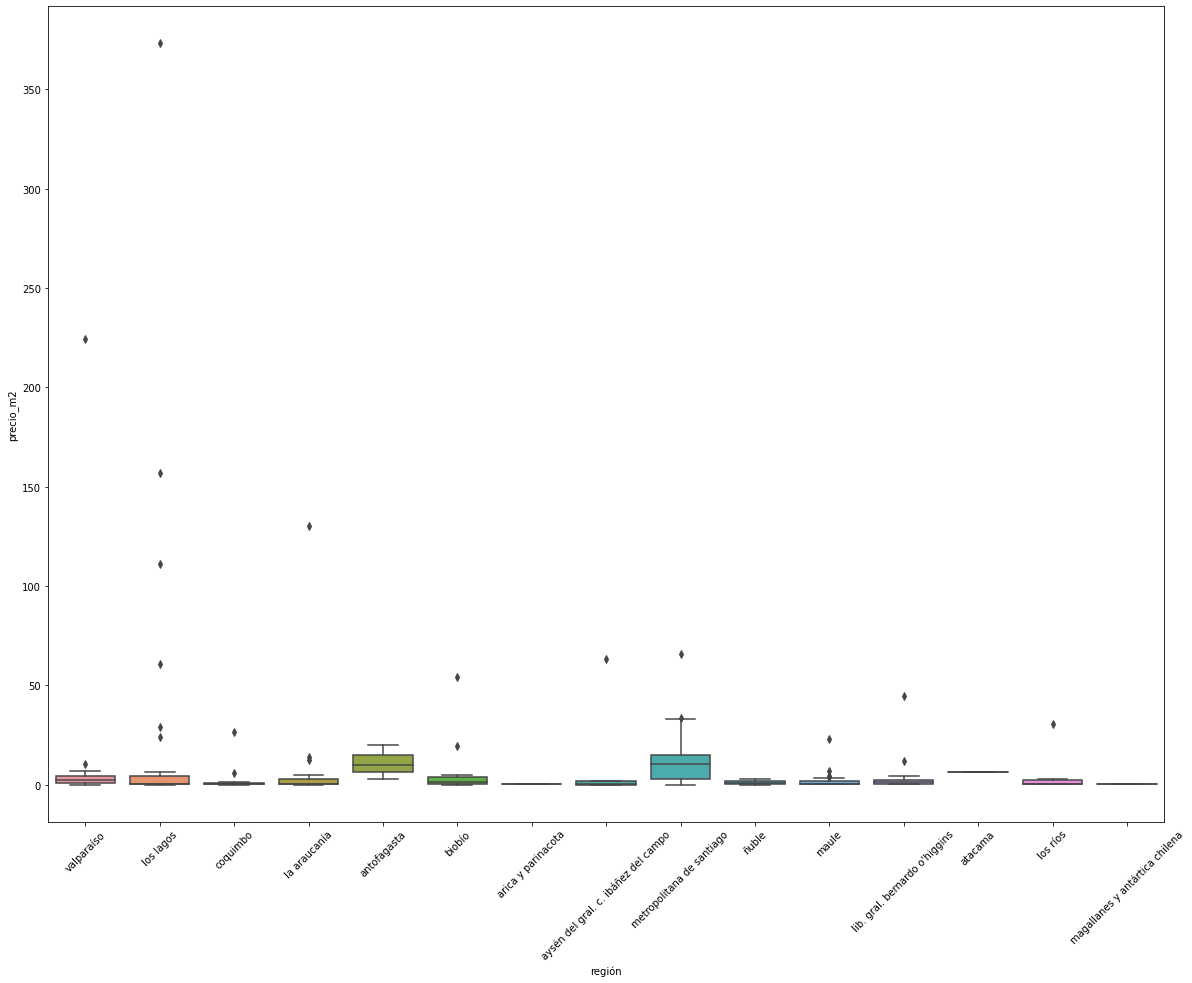

In [148]:
fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
#ax.set_ylim([0,0.1*1e6])
sb.boxplot(data=beauty, x="región", y="precio_m2", ax=ax)

Now, I'll be focusing in a particular region. In this next code box, we'll be studying 'Los Lagos' region.

ValueError: min() arg is an empty sequence

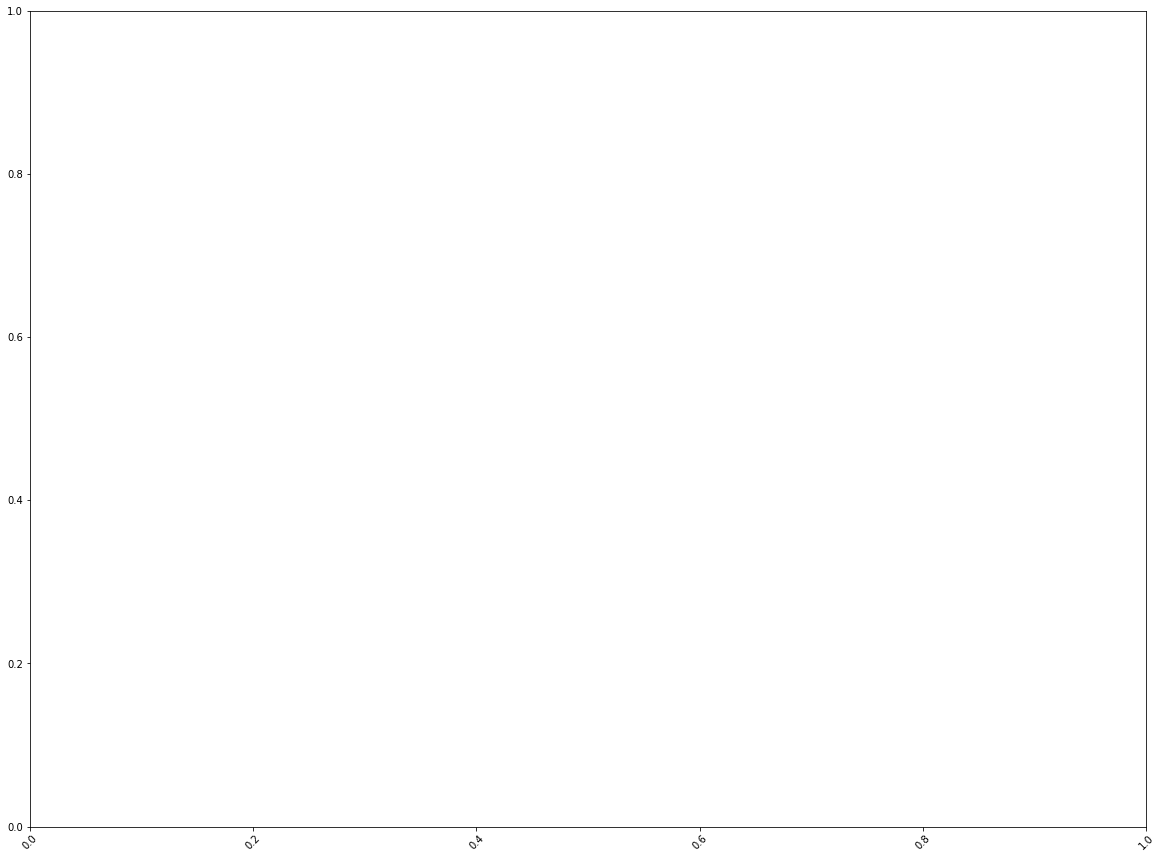

In [153]:
fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
#ax.set_ylim([0,0.04*1e6])
comm_merge = df.merge(comm_df)
sells_mask = np.all([comm_merge["región"]=="los lagos", \
    np.any([comm_merge["propiedad"]=="casas",comm_merge["propiedad"]=="terrenos"], axis=0)], \
        axis=0)
loslagos = comm_merge.loc[sells_mask, :]
sb.boxplot(data=loslagos, x="comuna", y="precio_m2", ax=ax)

In [152]:
loslagos.loc[loslagos["comuna"]=="frutillar",:]

,oferta,propiedad,monto,moneda,direccion,inmobiliaria,comentario,comuna,unidad_medida,min_n_dormitorios,...,precio_m2,cut,provincia,región,superficie(km²),población2020,densidad(hab./km²),idh 2005,latitud,longitud
14533,venta,casas,12081,uf,"punta larga km1, frutillar",condominio palena - patagonia virgin,NaN,frutillar,m²,3.0,...,86.292857,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
14534,venta,casas,6500,uf,"ww3f+qm colonia la radio, frutillar, chile, fr...",NaN,preciosa casa en parcela de 5000 en frutillar ...,frutillar,m²,4.0,...,58.558559,10105,llanquihue,los lagos,8314.0,20223,24.3,0.669,"-41°7'1.2""","-73°5'60"""
